# Import

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Read dataset

#### Description of features

1.  `date`: Date of logging IoT telemetry data
2.  `time`: Time of logging IoT telemetry data
3.  `FC1_Read_Input_Register`: Modbus function code that is responsible for reading an input register 
4.  `FC2_Read_Discrete_Value`: Modbus function code that is in charge of  reading a discrete value 
5. `FC3_Read_Holding_Register`: Modbus function code that is responsible for reading a holding register 
6. `FC4_Read_Coil`: Modbus function code that is responsible for reading a coil 
7. `label`: Tag normal and attack records, where 0 indicates normal and 1 indicates attacks  
8. `type`:  Tag attack categories, such as normal, DoS, DDoS and backdoor attacks, and normal records 



In [4]:
data = pd.read_csv('./datasets/IoT_Modbus.csv')
data

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal
...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal


## Check value counts


In [20]:
data['label'].value_counts()

0    222855
1     64339
Name: label, dtype: int64

In [58]:
data['FC1_Read_Input_Register'].value_counts()

0        67
47954    27
63090    25
58321    25
57       25
         ..
64758     1
27447     1
20499     1
10114     1
54391     1
Name: FC1_Read_Input_Register, Length: 53670, dtype: int64

In [59]:
data['FC2_Read_Discrete_Value'].value_counts()

0        59
63985    30
39874    27
326      26
29527    26
         ..
54468     1
37231     1
33056     1
30614     1
42273     1
Name: FC2_Read_Discrete_Value, Length: 53558, dtype: int64

In [60]:
data['FC3_Read_Holding_Register'].value_counts()

0        64
8211     28
25013    28
33554    25
58160    25
         ..
43581     1
6043      1
52997     1
34988     1
19415     1
Name: FC3_Read_Holding_Register, Length: 53451, dtype: int64

In [61]:
data['FC4_Read_Coil'].value_counts()

0        59
37322    27
52722    27
23308    26
47641    25
         ..
1641      1
17197     1
25372     1
18714     1
5013      1
Name: FC4_Read_Coil, Length: 53668, dtype: int64

In [62]:
data['type'].value_counts()

normal       222855
backdoor      40011
password      18115
injection      5186
scanning        529
xss             498
Name: type, dtype: int64

# Merge datetime

**Converting to DateTime Object**:
   - `pd.to_datetime`: The concatenated string is then converted into a datetime object using Pandas' `to_datetime` function. The `format` parameter is specified as `%d-%b-%y %H:%M:%S`, which matches the format of the input strings, ensuring accurate parsing.
   - The resultant 'datetime' column now provides a more useful and standardized format for any subsequent data analysis or time series modeling, integrating both date and time information into a single, coherent column.
   - The resultant 'hour' column now provides information on recording data in which hour of that day.

In [5]:
# merge datetime and extract hour data
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['hour'] = data['datetime'].dt.hour

In [22]:
data

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,datetime,hour
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal,2019-03-31 12:36:55,12
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,2019-03-31 12:36:58,12
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,2019-03-31 12:36:58,12
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal,2019-03-31 12:37:00,12
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal,2019-03-31 12:37:01,12
...,...,...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal,2019-04-29 23:59:10,23
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal,2019-04-29 23:59:22,23
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal,2019-04-29 23:59:26,23
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal,2019-04-29 23:59:32,23


In [6]:
data['hour'].value_counts()

6     32393
12    22021
16    12563
21    12455
23    12084
17    12016
7     11780
19    11767
15    11546
20    11435
18    11407
9     11015
0     10954
1     10841
22    10690
8     10122
4      9961
11     9825
10     9715
2      9054
14     8950
5      8584
3      8220
13     7796
Name: hour, dtype: int64

# Attack distribute graph
    This graph shows the distribution of attack times in each hour of the whole dataset

In [7]:
label_list = []
for i in range(24):
    result = data[data['hour'] == i]['label'].value_counts()
    label_list.append([result[0],result[1]])

In [9]:
label_counts = pd.DataFrame(columns=['0','1'],data=label_list)
label_counts

,0,1
0,5832,5122
1,5940,4901
2,5218,3836
3,7754,466
4,9933,28
5,8059,525
6,32347,46
7,10915,865
8,6477,3645
9,6630,4385


<Axes: title={'center': 'Attack distribution'}>

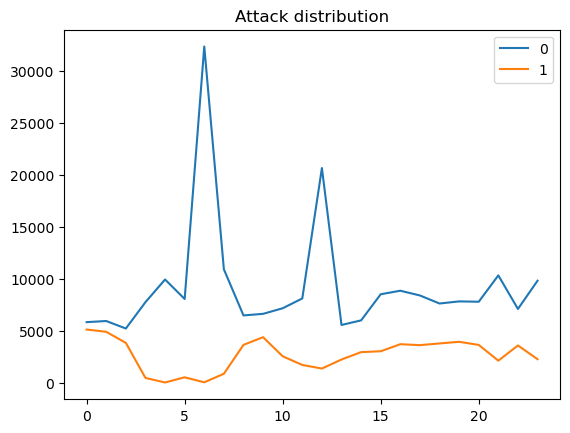

In [10]:
label_counts.plot(title='Attack distribution')

# Attack type distribute graph
    This graph shows the distribution of times of each attack type in each hour of the whole dataset

In [11]:
type_list = []
for i in range(24):
    result = data[data['hour'] == i]['type'].value_counts()
    type_list.append(result.to_dict())

In [12]:
column_names = list(data['type'].value_counts().to_dict().keys())
type_counts = pd.DataFrame(columns=column_names,data=type_list)
type_counts

,normal,backdoor,password,injection,scanning,xss
0,5832,3495.0,1627.0,NaN,NaN,NaN
1,5940,3515.0,1386.0,NaN,NaN,NaN
2,5218,2650.0,1186.0,NaN,NaN,NaN
3,7754,NaN,466.0,NaN,NaN,NaN
4,9933,NaN,NaN,NaN,NaN,28.0
5,8059,55.0,NaN,NaN,NaN,470.0
6,32347,46.0,NaN,NaN,NaN,NaN
7,10915,863.0,NaN,2.0,NaN,NaN
8,6477,1836.0,NaN,1809.0,NaN,NaN
9,6630,1816.0,NaN,2569.0,NaN,NaN


In [78]:
type_counts.fillna(0)

,normal,backdoor,password,injection,scanning,xss
0,5832,3495.0,1627.0,0.0,0.0,0.0
1,5940,3515.0,1386.0,0.0,0.0,0.0
2,5218,2650.0,1186.0,0.0,0.0,0.0
3,7754,0.0,466.0,0.0,0.0,0.0
4,9933,0.0,0.0,0.0,0.0,28.0
5,8059,55.0,0.0,0.0,0.0,470.0
6,32347,46.0,0.0,0.0,0.0,0.0
7,10915,863.0,0.0,2.0,0.0,0.0
8,6477,1836.0,0.0,1809.0,0.0,0.0
9,6630,1816.0,0.0,2569.0,0.0,0.0


<Axes: title={'center': 'Attack types distribution'}>

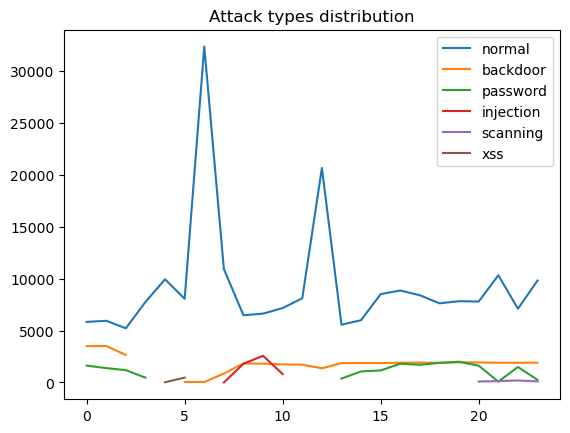

In [13]:
type_counts.plot(title='Attack types distribution')

# Scatter graph
    Scatter graph of some features with time

<Axes: title={'center': 'FC1_Read_Input_Register Scatter Graph'}, xlabel='hour', ylabel='FC1_Read_Input_Register'>

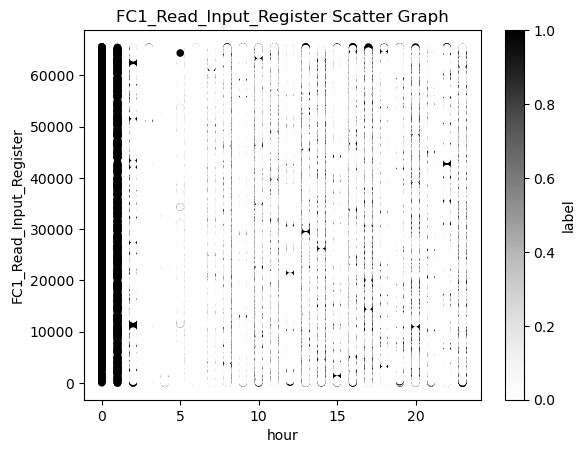

In [14]:
data.plot(kind='scatter',x='hour',y='FC1_Read_Input_Register',c = 'label', title='FC1_Read_Input_Register Scatter Graph')

<Axes: title={'center': 'FC2_Read_Discrete_Value Scatter Graph'}, xlabel='hour', ylabel='FC2_Read_Discrete_Value'>

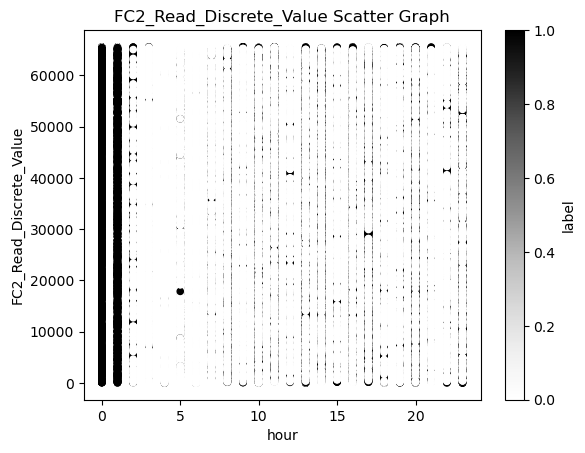

In [15]:
data.plot(kind='scatter',x='hour',y='FC2_Read_Discrete_Value',c = 'label', title='FC2_Read_Discrete_Value Scatter Graph')

<Axes: title={'center': 'FC3_Read_Holding_Register Scatter Graph'}, xlabel='hour', ylabel='FC3_Read_Holding_Register'>

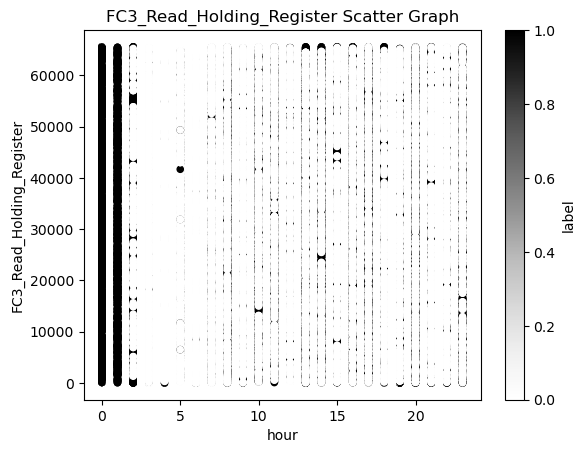

In [16]:

data.plot(kind='scatter',x='hour',y='FC3_Read_Holding_Register',c = 'label', title='FC3_Read_Holding_Register Scatter Graph')

<Axes: title={'center': 'FC4_Read_Coil Scatter Graph'}, xlabel='hour', ylabel='FC4_Read_Coil'>

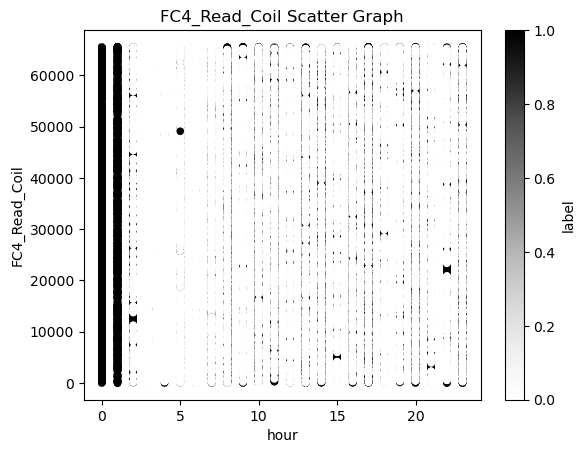

In [17]:
data.plot(kind='scatter',x='hour',y='FC4_Read_Coil',c = 'label', title='FC4_Read_Coil Scatter Graph')

In [20]:
pie_data = data['type'].value_counts().to_dict()

In [37]:
list(pie_data.values())[1:]

[40011, 18115, 5186, 529, 498]

([<matplotlib.patches.Wedge at 0x2887d9400>,
 [Text(-0.41096359991649645, 1.020347450402888, 'backdoor'),
  Text(0.08737708492697922, -1.0965241652739184, 'password'),
  Text(1.0319757848513738, -0.38082276649432545, 'injection'),
  Text(2.094180560995487, -0.1562298881412468, 'scanning'),
  Text(2.0993791553625485, -0.05106037631307544, 'xss')])

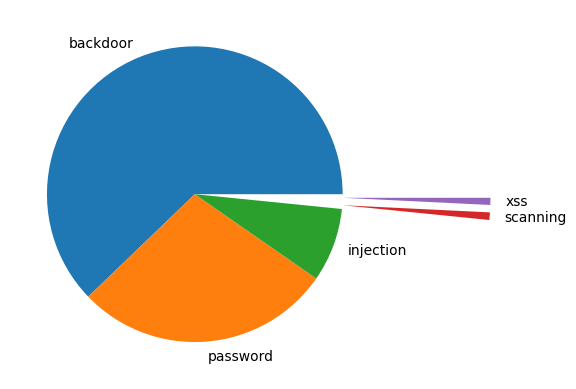

In [47]:
explode = [0,0,0,1,1]
plt.pie(x=list(pie_data.values())[1:],labels=list(pie_data.keys())[1:],explode=explode)